In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('punkt')
nltk.download('stopwords')

pd.set_option('display.max_rows',200)

[nltk_data] Downloading package punkt to /Users/suerran/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/suerran/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Data Prep

In [3]:
ailes = pd.read_csv('aisles.csv')
department = pd.read_csv('departments.csv')
orders=pd.read_csv('orders.csv')
products=pd.read_csv('products.csv')
order_prior= pd.read_csv('order_products__prior.csv')
order_train=pd.read_csv('order_products__train.csv')

In [4]:
order_all=pd.concat((order_prior, order_train), axis=0)
order_full=orders.merge(order_all, on='order_id', how='left')
order_full.head(n=25)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
0,2539329,1,prior,1,2,8,NaN,196.0,1.0,0.0
1,2539329,1,prior,1,2,8,NaN,14084.0,2.0,0.0
2,2539329,1,prior,1,2,8,NaN,12427.0,3.0,0.0
3,2539329,1,prior,1,2,8,NaN,26088.0,4.0,0.0
4,2539329,1,prior,1,2,8,NaN,26405.0,5.0,0.0
5,2398795,1,prior,2,3,7,15.0,196.0,1.0,1.0
6,2398795,1,prior,2,3,7,15.0,10258.0,2.0,0.0
7,2398795,1,prior,2,3,7,15.0,12427.0,3.0,1.0
8,2398795,1,prior,2,3,7,15.0,13176.0,4.0,0.0
9,2398795,1,prior,2,3,7,15.0,26088.0,5.0,1.0


In [5]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [6]:
ailes.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [7]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [8]:
department.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [10]:
product_full=products.merge(department, how="left", on="department_id").merge(ailes, how="left", on="aisle_id")
df=order_full.merge(product_full, how="left", on="product_id")

In [11]:
df.describe()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,department_id
count,3.389411e+07,3.389411e+07,3.389411e+07,3.389411e+07,3.389411e+07,3.181604e+07,3.381911e+07,3.381911e+07,3.381911e+07,3.381911e+07,3.381911e+07
mean,1.710564e+06,1.029445e+05,1.713871e+01,2.737388e+00,1.343158e+01,1.137763e+01,2.557551e+04,8.367738e+00,5.900617e-01,7.121799e+01,9.918544e+00
std,9.874018e+05,5.946732e+04,1.749646e+01,2.093372e+00,4.246102e+00,8.949251e+00,1.409770e+04,7.139540e+00,4.918220e-01,3.819898e+01,6.281655e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
25%,8.554130e+05,5.143500e+04,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,1.351900e+04,3.000000e+00,0.000000e+00,3.100000e+01,4.000000e+00
50%,1.710659e+06,1.026270e+05,1.100000e+01,3.000000e+00,1.300000e+01,8.000000e+00,2.525600e+04,6.000000e+00,1.000000e+00,8.300000e+01,9.000000e+00
75%,2.565583e+06,1.544110e+05,2.400000e+01,5.000000e+00,1.600000e+01,1.500000e+01,3.793500e+04,1.100000e+01,1.000000e+00,1.070000e+02,1.600000e+01
max,3.421083e+06,2.062090e+05,1.000000e+02,6.000000e+00,2.300000e+01,3.000000e+01,4.968800e+04,1.450000e+02,1.000000e+00,1.340000e+02,2.100000e+01


In [12]:
df.nunique()

order_id                  3421083
user_id                    206209
eval_set                        3
order_number                  100
order_dow                       7
order_hour_of_day              24
days_since_prior_order         31
product_id                  49685
add_to_cart_order             145
reordered                       2
product_name                49685
aisle_id                      134
department_id                  21
department                     21
aisle                         134
dtype: int64

# Order Analysis

In [15]:
#Sales by DOW

orders_dow=df.groupby(['order_dow'])['order_id'].nunique().reset_index()
orders_dow['order_dow'].replace(0,7, inplace=True)
orders_dow=orders_dow.sort_values('order_dow')
orders_dow['order_dow']=orders_dow['order_dow'].apply({ 1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday',
                                                      5:'Friday', 6:'Saturady', 7:'Sunday'}.get)
orders_dow.rename(columns={'order_dow':'day_of_week', 'order_id':'total_orders'}, inplace=True)
orders_dow



,day_of_week,total_orders
1,Monday,587478
2,Tuesday,467260
3,Wednesday,436972
4,Thursday,426339
5,Friday,453368
6,Saturady,448761
0,Sunday,600905


Text(0, 0.5, 'Total Orders')

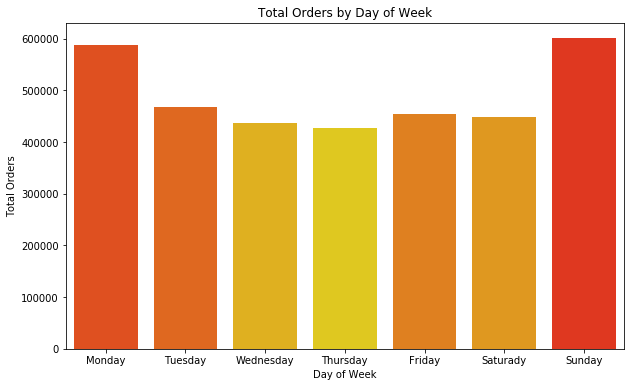

In [16]:
f=plt.figure(figsize=(10,6))
pal = sns.color_palette("autumn", len(orders_dow.total_orders))
rank = orders_dow['total_orders'].argsort().argsort()

sns.barplot(data=orders_dow, x='day_of_week', y='total_orders', palette=np.array(pal[::-1])[rank])
plt.title('Total Orders by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Total Orders')

In [17]:
#sales by hours of the day

orders_hod=df.groupby(['order_hour_of_day'])['order_id'].nunique().reset_index()
orders_hod.rename(columns={'order_hour_of_day':'hour_of_day', 'order_id':'total_orders'}, inplace=True)
orders_hod

,hour_of_day,total_orders
0,0,22758
1,1,12398
2,2,7539
3,3,5474
4,4,5527
5,5,9569
6,6,30529
7,7,91868
8,8,178201
9,9,257812


Text(0, 0.5, 'Total Orders')

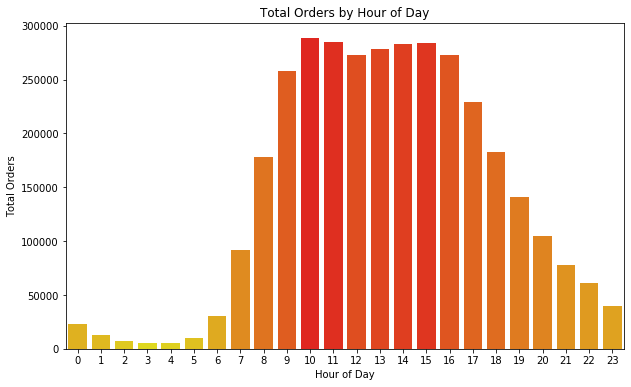

In [18]:
f=plt.figure(figsize=(10,6))
pal = sns.color_palette("autumn", len(orders_hod.total_orders))
rank = orders_hod['total_orders'].argsort().argsort()

sns.barplot(data=orders_hod, x='hour_of_day', y='total_orders', palette=np.array(pal[::-1])[rank])

plt.title('Total Orders by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Total Orders')

In [19]:
#Orders by DoW & HoD 

order_dow_hod=df.groupby(['order_dow','order_hour_of_day'])['order_id'].nunique().reset_index()
order_dow_hod['order_dow'].replace(0,7, inplace=True)
order_dow_hod.sort_values('order_dow', inplace=True)
order_dow_hod

,order_dow,order_hour_of_day,order_id
35,1,11,51584
24,1,0,3674
25,1,1,1830
26,1,2,1105
27,1,3,748
28,1,4,809
29,1,5,1607
30,1,6,5370
31,1,7,16571
32,1,8,34116


In [20]:
order_dow_hod.rename(columns={'order_dow':'day_of_week', 'order_hour_of_day':'hour_of_day','order_id':'total_orders'}, inplace=True)

Text(69.0, 0.5, 'Hour of Day')

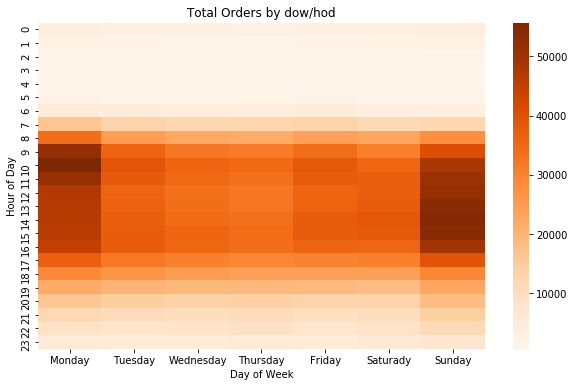

In [21]:
order_dow_hod_pivot=order_dow_hod.pivot(index='day_of_week', columns='hour_of_day', values='total_orders')
order_dow_hod_pivot.rename(index={ 1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday',
                                                      5:'Friday', 6:'Saturady', 7:'Sunday'}, inplace=True)

order_dow_hod_pivot

f=plt.figure(figsize=(10,6))
sns.heatmap(order_dow_hod_pivot.T, cmap='Oranges')

plt.title('Total Orders by dow/hod')
plt.xlabel('Day of Week')
plt.ylabel('Hour of Day')

In [22]:
#Avger Order Intervals

In [23]:
order_interval_trim=df[['order_id','user_id','days_since_prior_order']].drop_duplicates().dropna()
order_interval_trim.head()

,order_id,user_id,days_since_prior_order
5,2398795,1,15.0
11,473747,1,21.0
16,2254736,1,29.0
21,431534,1,28.0
29,3367565,1,19.0


In [24]:
order_interval_by_user=order_interval_trim.groupby(['user_id'])['days_since_prior_order'].mean().round(0).reset_index()
order_interval_distribution=order_interval_by_user.groupby('days_since_prior_order')['user_id'].count().reset_index()
order_interval_distribution['days_since_prior_order']=order_interval_distribution['days_since_prior_order'].astype(int)

order_interval_distribution.rename(columns={'days_since_prior_order':'avg_order_interval', 'user_id':'users'}, inplace=True)

Text(0, 0.5, 'Total Users')

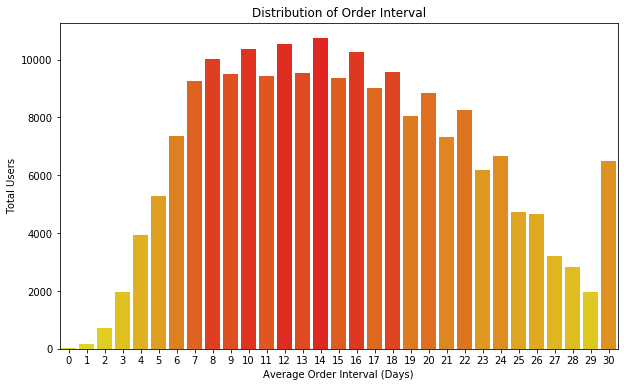

In [25]:
f=plt.figure(figsize=(10,6))

pal = sns.color_palette("autumn", len(order_interval_distribution.users))
rank = order_interval_distribution['users'].argsort().argsort()



sns.barplot(data=order_interval_distribution, x='avg_order_interval', y='users', palette=np.array(pal[::-1])[rank])

plt.title('Distribution of Order Interval')
plt.xlabel('Average Order Interval (Days)')
plt.ylabel('Total Users')

# Product Analysis

In [27]:
#Best selling items

product_quantity_sold=df.groupby(['product_name'])['product_id'].count().reset_index().sort_values(by='product_id', ascending=False)

product_quantity_sold.rename(columns={'product_name':'Product', 'product_id':'Quantity Sold'}, inplace=True)

product_quantity_sold['%of Total']=(product_quantity_sold['Quantity Sold']/df.product_id.count()).astype(float).map("{:.2%}".format)

In [28]:
top15_products=product_quantity_sold.head(15)
top15_products.set_index('Product')

,Quantity Sold,%of Total
Product,,
Banana,491291,1.45%
Bag of Organic Bananas,394930,1.17%
Organic Strawberries,275577,0.81%
Organic Baby Spinach,251705,0.74%
Organic Hass Avocado,220877,0.65%
Organic Avocado,184224,0.54%
Large Lemon,160792,0.48%
Strawberries,149445,0.44%
Limes,146660,0.43%


In [30]:
#Top items by category (aisles)

top_product_category=df.groupby(['aisle','product_name'])['product_id'].count().reset_index().sort_values(by='product_id', ascending=False).groupby('aisle').head(1)
top_product_category.rename(columns={'aisle':'Category', 'product_name':'Product','product_id':'Quantity Sold'}, inplace=True)
top_product_category=top_product_category.set_index('Category')

In [31]:
top_product_category.head(15)

,Product,Quantity Sold
Category,,
fresh fruits,Banana,491291
packaged vegetables fruits,Organic Baby Spinach,251705
milk,Organic Whole Milk,142813
fresh vegetables,Organic Yellow Onion,117716
water seltzer sparkling water,Sparkling Water Grapefruit,79245
cream,Organic Half & Half,79006
fresh dips tapenades,Original Hummus,74172
fresh herbs,Organic Cilantro,73050
bread,100% Whole Wheat Bread,63114


In [32]:
#Most reordered item

most_reordered=df.groupby(['product_name'])['reordered'].sum().reset_index().sort_values(by=['reordered'], ascending=False)
most_reordered['reordered']=most_reordered['reordered'].astype(int)
most_reordered.rename(columns={'product_name':'Product', 'reordered':'Times Reordered'}, inplace=True)
most_reordered.set_index('Product',inplace=True)

In [33]:
most_reordered.head(15)

,Times Reordered
Product,
Banana,415166
Bag of Organic Bananas,329275
Organic Strawberries,214448
Organic Baby Spinach,194939
Organic Hass Avocado,176173
Organic Avocado,140270
Organic Whole Milk,118684
Large Lemon,112178
Organic Raspberries,109688


In [34]:
#Avg. added to cart order
item_to_cart_avg=df.groupby(['product_name'])['add_to_cart_order'].mean().reset_index().sort_values(by='add_to_cart_order', ascending=True)
item_to_cart_avg

,product_name,add_to_cart_order
13537,Easter Basket,1.0
2278,American Blend,1.0
23919,Lowfat Cherry Lime Supernova Kefir Cultured Mi...,1.0
33799,Pappardelle Nests Pasta,1.0
20980,Indian Wells Merlot,1.0
...,...,...
26158,"Molasses, Bead",34.0
13623,Eczema Control,41.0
46979,Vanilla Bean Sheep Milk Ice Cream,46.0
42992,Strawberry Energy Gel,50.0


In [36]:
#Items Bought by most users
product_popularity=df.groupby('product_name')['user_id'].nunique().reset_index().sort_values(by='user_id', ascending=False)
product_popularity.rename(columns={'user_id':'no_of_users'}, inplace=True)

product_popularity['%of Users']=(product_popularity['no_of_users']/df.user_id.nunique()).astype(float).map("{:.2%}".format)
product_popularity.rename(columns={'product_name':'Product', 'no_of_users':'Total Users'}, inplace=True)



In [37]:
product_popularity.set_index('Product').head(15)

,Total Users,%of Users
Product,,
Banana,76125,36.92%
Bag of Organic Bananas,65655,31.84%
Organic Strawberries,61129,29.64%
Organic Baby Spinach,56766,27.53%
Large Lemon,48614,23.58%
Limes,46658,22.63%
Strawberries,44857,21.75%
Organic Hass Avocado,44704,21.68%
Organic Avocado,43954,21.32%


In [38]:
#Most popular products by keyword

top_N=25

txt=product_quantity_sold.head(10000).Product.str.cat(sep=' ')
words=nltk.tokenize.word_tokenize(txt)
word_dist=nltk.FreqDist(words)


rslt=pd.DataFrame(word_dist.most_common(top_N), columns=['Word', 'Frequency']).set_index('Word')

filter=(rslt.index=='&') | (rslt.index=='with') | (rslt.index=='%') |(rslt.index==',')
rslt[~filter].head(15)

,Frequency
Word,
Organic,1808
Cheese,559
Chocolate,532
Free,485
Yogurt,421
Milk,408
Original,384
Whole,327
Chicken,301


# User Analysis

In [39]:
#user frequency  & total orders
order_full.head()
order_full_trim=order_full[['order_id','user_id','days_since_prior_order']]
order_full_trim=order_full_trim.drop_duplicates()
order_full_trim.nunique()

order_id                  3421083
user_id                    206209
days_since_prior_order         31
dtype: int64

In [40]:
avg_order_interval=order_full_trim.dropna().groupby(['user_id'])['days_since_prior_order'].mean().reset_index().round(1)
avg_order_interval.rename(columns={'days_since_prior_order':'avg_order_interval'}, inplace=True)
avg_order_interval

,user_id,avg_order_interval
0,1,19.0
1,2,16.3
2,3,12.0
3,4,17.0
4,5,11.5
...,...,...
206204,206205,16.7
206205,206206,3.7
206206,206207,14.3
206207,206208,7.4


In [41]:
total_orders_user=order_full_trim.groupby(['user_id'])['order_id'].count().reset_index()
total_orders_user.rename(columns={'order_id':'no_of_orders'}, inplace=True)
total_orders_user

,user_id,no_of_orders
0,1,11
1,2,15
2,3,13
3,4,6
4,5,5
...,...,...
206204,206205,4
206205,206206,68
206206,206207,17
206207,206208,50


In [42]:
user_order_size=order_full.groupby(['user_id','order_id'])['product_id'].count().reset_index()
avg_user_order_size=user_order_size.groupby(['user_id'])['product_id'].mean().reset_index().round(2)
avg_user_order_size.rename(columns={'product_id':'avg_items_bought'}, inplace=True)
avg_user_order_size

,user_id,avg_items_bought
0,1,6.36
1,2,15.07
2,3,6.77
3,4,3.00
4,5,9.20
...,...,...
206204,206205,12.75
206205,206206,4.19
206206,206207,13.12
206207,206208,13.54


In [45]:
user_freq_quan=total_orders_user.merge(avg_order_interval, on='user_id', how='left').merge(avg_user_order_size, on='user_id', how='left')

user_freq_quan.rename(columns={'user_id':'User ID', 'no_of_orders':'Number of Orders', 
                               'avg_order_interval':'Avg. order Interval',
                              'avg_items_bought':'Avg. Items per Order'}, inplace=True)
user_freq_quan.head()

,User ID,Number of Orders,Avg. order Interval,Avg. Items per Order
0,1,11,19.0,6.36
1,2,15,16.3,15.07
2,3,13,12.0,6.77
3,4,6,17.0,3.00
4,5,5,11.5,9.20


In [46]:
#User's favourite category

In [44]:
fav_category_by_user=df.groupby(['user_id','aisle'])['product_id'].count().reset_index().sort_values(by='product_id', ascending=False).groupby('user_id').head(1).set_index('user_id')
fav_category_by_user.rename(columns={'aisle':'Category', 'product_id':'Items Bought'}, inplace=True)
fav_category_by_user.sort_index().head(15)

,Category,Items Bought
user_id,,
1,soft drinks,15
2,yogurt,42
3,fresh fruits,19
4,frozen meals,3
5,packaged vegetables fruits,10
6,fresh vegetables,4
7,refrigerated,31
8,fresh vegetables,29
9,yogurt,28


In [47]:
#user's favourite items
fav_product_by_user=df.groupby(['user_id','product_name'])['product_id'].count().reset_index().sort_values(by='product_id', ascending=False).groupby('user_id').head(1).set_index('user_id')
fav_product_by_user.rename(columns={'product_name':'Product', 'product_id':'Quantity Bought'}, inplace=True)
fav_product_by_user.sort_index().head(15)

,Product,Quantity Bought
user_id,,
1,Soda,11
2,Chipotle Beef & Pork Realstick,10
3,Vanilla Unsweetened Almond Milk,10
4,Enchilada Black Bean Vegetable,2
5,Organic Blackberries,4
6,Organic Baby Spinach,2
7,Lactose Free Fat Free Milk,14
8,Organic Leek,4
9,Almond Non-Dairy Yogurt Made From Real Almonds...,4


In [48]:
#User's favourite order time

def weekday(row):
    if row['order_dow']>=1 & row['order_dow']<=5:
        return 'Weekdays'
    return 'Weekends'

def time_of_day(row):
    if row['order_hour_of_day']>=5 & row['order_dow']<=12:
        return 'Morning'
    if row['order_hour_of_day']>=13 & row['order_dow']<=17:
        return 'Afternoon'
    return 'Evening'

orders_dowhod=df[['order_id','user_id','order_dow','order_hour_of_day']].drop_duplicates(subset='order_id',keep='first')
orders_dowhod['weekday/weekend']=orders_dowhod.apply(lambda row: weekday(row), axis=1)
orders_dowhod['time_of_day']=orders_dowhod.apply(lambda row: time_of_day(row), axis=1)

In [49]:

fav_time_by_user=orders_dowhod.groupby(['user_id','weekday/weekend','time_of_day'])['order_id'].count().reset_index().sort_values(by='order_id', ascending=False).groupby('user_id').head(1)

fav_time_by_user['Favourite Time']=fav_time_by_user['weekday/weekend']+'-'+fav_time_by_user['time_of_day']

fav_time_by_user_clean=fav_time_by_user[['user_id','Favourite Time']]
fav_time_by_user_clean.sort_values(by='user_id').set_index('user_id').head(15)

,Favourite Time
user_id,
1,Weekdays-Morning
2,Weekdays-Morning
3,Weekdays-Morning
4,Weekdays-Morning
5,Weekdays-Morning
6,Weekdays-Morning
7,Weekdays-Morning
8,Weekdays-Evening
9,Weekdays-Morning
